If intervention only or with support 
depends on data used.


'three types of interests' 
These are 'concrete interests' (access to resources and security concerns), 'general interests' (Human rights, democracy, promotion of the market economy in the case of the United States and promotion of communism and the opposition of imperialism in the case of the Soviet Union) and 'global security interests'; 


## 1. 'Global security' motivations

### Hypo 1: 
X - MP more likely to intervene if opponent intervenes
(type of other intervention) mil / nonmil

### Hypo 1B: 
X - More likely to intervene if block (both) present

### Hypo 1C: 
X - More likely to intervene if leaning / def
X - More likely to intervene if leaning / OF

^-- Voor US / SU

BONUS: Monroe doctrine
- SU Intervention if COMM intervention?

US reactive? 
____

## 2. 'Ideological motivations'

### Hypo 2: 
X - US: Domnestic politics matter

### Hypo 2B: 
X - US: Domnestic politics (democ, autoc, leanings) - US pragmatic
AKA - cancel 'just cause'

### Hypo 2.1: 
X - SU: Domnestic politics matter

### Hypo 2.1B: 
X - SU: Domnestic politics (democ, autoc, leanings) - SU pragmatic
VOEG COL TOE. Zien we of just cause is. 

______

### Hypo 3: 'Concrete interests'
(aka, invloed van hoe 'belangrijk / nuttig land is)
- Leaning van nation
- Cinc score van nation

### Hypo 3B: 'Concrete interests'
(aka, invloed van hoe 'belangrijk / nuttig land is)
- Leaning van nation
- Cinc score van nation

______


### Hypo 4: 'Domnestic politics' / actor centric
- US presidents
- Vietnam moment
- Election year
- GPDP eco ding

### Hypo 4B: 'Domnestic politics' / actor centric
- SU leaders
- GDP eco ding
______

### Hypo 5: Anti colonial politics matter

- NATIND increaes chance of soviet intervention
- NATIND increases chance of COMM intervention
- Col powers deterred Effect of Soviet Intervention on Col powers
- NATIND only US if com involved. 
------



YOYOYO AFGHAN WAR



## Load modules

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import sklearn as sk

## Load data

In [4]:
# Create datasets for grouped data operations
df = pd.read_csv('./output/masterfile.csv')
cy_df = df

mask = df['DUMMY_CIVIL'] == 1
cw_df = df[mask]

# Add 'share' info to the table

temp = cw_df.groupby('year')[
    ['United States', 'Soviet Union', 'US_none_mil', 'SU_none_mil', 'DUMMY_CIVIL']
].sum()
temp['US_share'] = temp['United States'] / temp['DUMMY_CIVIL']
temp['SU_share'] = temp['Soviet Union'] / temp['DUMMY_CIVIL']
temp['US_non_mil_share'] = temp['US_none_mil'] / temp['DUMMY_CIVIL']
temp['SU_non_mil_share'] = temp['SU_none_mil'] / temp['DUMMY_CIVIL']
temp = temp.reset_index()
temp = temp[['year','US_share', 'SU_share', 'US_non_mil_share',
       'SU_non_mil_share']]
cw_df = cw_df.merge(temp, left_on='year', right_on='year', how='left')

cw_grouped = cw_df.groupby('year').agg(
    {
        'Republican': 'first',
        'Democratic': 'first',
        'US_milex': 'first', 
        'SU_milex': 'first',
        'UK_milex': 'first',
        'FR_milex': 'first',
        'COL_milex': 'first',
        'COM_milex': 'first',
        'Soviet Union': 'sum',
        'United States': 'sum',
        'France': 'sum', 
        'United Kingdom': 'sum',
        'COL_IMI': 'sum',
        'US_cinc': 'first',
        'SU_cinc': 'first',
        'UK_cinc': 'first',
        'FR_cinc': 'first',
        'COL_cinc': 'first',
        'COM_cinc': 'first',
        'ponatind': 'sum',
        'onatind': 'sum',
        'pointrap': 'sum',
        'ointrap': 'sum',
        'pointer': 'sum',
        'ointer': 'sum',
        'pocivil': 'sum',
        'ocivil': 'sum',
        'pononind': 'sum',
        'n_civilwars': 'first',
        'US_ci': 'sum',
        'SU_ci': 'sum',
        'COL_ci': 'sum',
        'FR_ci': 'sum',
        'UK_ci': 'sum',
        'CUBA_imi': 'sum',
        'CH_imi': 'sum',
        'COM_IMI': 'sum',
        'summed_COL_ci': 'first',
        'summed_US_ci': 'first',
        'summed_UK_ci': 'first',
        'summed_SU_ci': 'first',
        'summed_FR_ci': 'first',
        'DUMMY_CIVIL': 'sum',
        'NATIND': 'sum',
        'war_duration': 'mean',
        'US_any': 'sum',
        'SU_any': 'sum',
        'US_none_mil': 'sum',
        'president': 'first',
        
        'SU_eco': 'sum',
        'SU_intel': 'sum',
        'SU_joint_ops': 'sum',
        'SU_logistics': 'sum',
        'SU_none_mil': 'sum',
        'SU_other': 'sum',
        'SU_training': 'sum',
        'SU_troops': 'sum',
        'SU_weapons': 'sum', 
        
        'US_eco': 'sum',
        'US_intel': 'sum',
        'US_joint_ops': 'sum',
        'US_logistics': 'sum',
        'US_none_mil': 'sum',
        'US_other': 'sum',
        'US_training': 'sum',
        'US_troops': 'sum',
        'US_weapons': 'sum', 
        
        'Vietnam_dummy': 'first',
        'Vietnam_years_since': 'first',
        'pres_election_year': 'first',
        
        'Dwight D. Eisenhower': 'first',
        'George H. W. Bush': 'first',
        'Gerald Ford': 'first',
        'Harry S. Truman': 'first',
        'Jimmy Carter': 'first',
        'John F. Kennedy': 'first',
        'Lyndon B. Johnson': 'first',
        'Richard Nixon': 'first',
        'Ronald Reagan': 'first',
        
        'Andropov': 'first',
        'Brezhnev': 'first',
        'Chernenko': 'first',
        'Gorbachev': 'first',
        'Khrushchev': 'first',
        'Stalin': 'first',
        
        'DUMMY_CIVIL': 'sum',
        
        'US_gdppc': 'first',
        'SU_gdppc': 'first',
        
    }
).reset_index()

cw_grouped['US_share'] = cw_grouped['United States'] / cw_grouped['DUMMY_CIVIL']
cw_grouped['US_non_mil_share'] = cw_grouped['US_none_mil'] / cw_grouped['DUMMY_CIVIL']

cw_grouped['SU_share'] = cw_grouped['Soviet Union'] / cw_grouped['DUMMY_CIVIL']
cw_grouped['SU_non_mil_share'] = cw_grouped['SU_none_mil'] / cw_grouped['DUMMY_CIVIL']

cy_grouped = df.groupby('year').agg(
    {
        'US_milex': 'first', 
        'SU_milex': 'first',
        'UK_milex': 'first',
        'FR_milex': 'first',
        'COL_milex': 'first',
        'COM_milex': 'first',
        'Soviet Union': 'sum',
        'United States': 'sum',
        'France': 'sum', 
        'United Kingdom': 'sum',
        'COL_IMI': 'sum',
        'US_cinc': 'first',
        'SU_cinc': 'first',
        'UK_cinc': 'first',
        'FR_cinc': 'first',
        'COL_cinc': 'first',
        'COM_cinc': 'first',
        'ponatind': 'sum',
        'onatind': 'sum',
        'pointrap': 'sum',
        'ointrap': 'sum',
        'pointer': 'sum',
        'ointer': 'sum',
        'pocivil': 'sum',
        'ocivil': 'sum',
        'pononind': 'sum',
        'n_civilwars': 'first',
        'US_ci': 'sum',
        'SU_ci': 'sum',
        'COL_ci': 'sum',
        'FR_ci': 'sum',
        'UK_ci': 'sum',
        'summed_COL_ci': 'first',
        'summed_US_ci': 'first',
        'summed_UK_ci': 'first',
        'summed_SU_ci': 'first',
        'summed_FR_ci': 'first',
        'DUMMY_CIVIL': 'sum',
        'NATIND': 'sum',
        'war_duration': 'mean',
        'US_any': 'sum',
        'SU_any': 'sum',
        'president': 'first',
        
        'Vietnam_dummy': 'first',
        'Vietnam_years_since': 'first',
        'pres_election_year': 'first',
        
        'Dwight D. Eisenhower': 'first',
        'George H. W. Bush': 'first',
        'Gerald Ford': 'first',
        'Harry S. Truman': 'first',
        'Jimmy Carter': 'first',
        'John F. Kennedy': 'first',
        'Lyndon B. Johnson': 'first',
        'Richard Nixon': 'first',
        'Ronald Reagan': 'first',
        
        'Andropov': 'first',
        'Brezhnev': 'first',
        'Chernenko': 'first',
        'Gorbachev': 'first',
        'Khrushchev': 'first',
        'Stalin': 'first',
    }
).reset_index()

grote = (12,6)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6900 entries, 0 to 6899
Columns: 309 entries, Unnamed: 0 to pres_election_year
dtypes: float64(229), int64(72), object(8)
memory usage: 16.3+ MB


## Create 'ethic' DFS for goal analysis

In [110]:
mask = cw_df['US_any'] == 1
US_ethic_df = cw_df[mask]

mask = cw_df['SU_any'] == 1
SU_ethic_df = cw_df[mask]

# Create 'rebels' DF's

## Define regression functions

In [5]:
def run(x, y, df=cw_df):
    """
    A simple function that runs Logit regressions
    """
    logit = sm.Logit(df[y], df[x], missing='drop')
    results = logit.fit(missing='drop')
    return results.summary()

def run_ols(x, y, df=cw_grouped):
    """
    A simple function that runs OLS regressions
    Regquires manual dataframe input - as there are multiple
    options
    """
    model = sm.OLS(df[y], sm.add_constant(df[x]))
    results = model.fit(missing='drop')
    return results.summary()

# Generate graphs for 'Data exploration' chapter

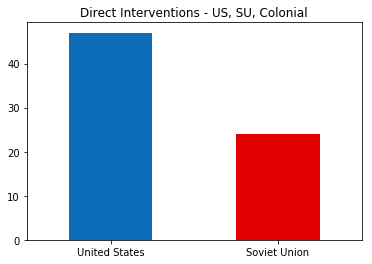

In [6]:
cw_grouped[[
    'United States', 
    'Soviet Union', 
    ]].sum().plot.bar(
    color=['#0e6db8', '#E30000', 'g'], rot=0,
    title='Direct Interventions - US, SU, Colonial'
)

plt.savefig('./graphs/barplot_direct.png')


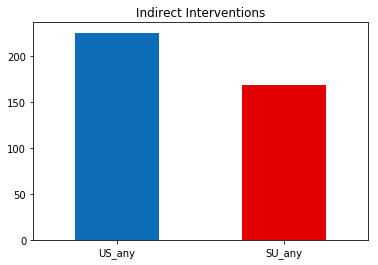

In [7]:
cw_grouped[[
    'US_any', 
    'SU_any', 
    ]].sum().plot.bar(
    color=['#0e6db8', '#E30000', 'g'], 
    rot=0, title='Indirect Interventions',
)
plt.savefig('./graphs/barplot_indirect.png')

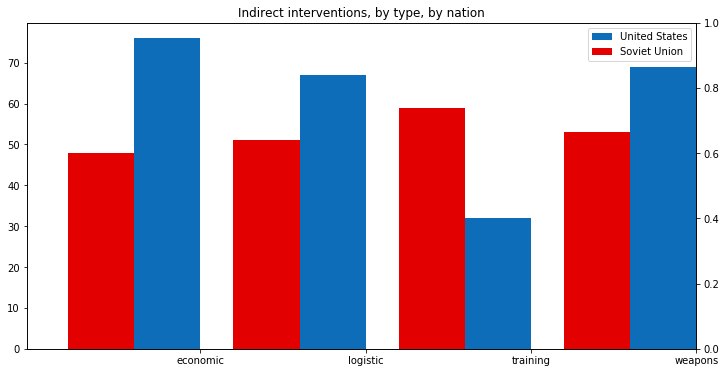

In [8]:
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4

cw_grouped[[
   
    'US_eco',
    'US_logistics',
    'US_training',
    'US_weapons', 
    
]].sum().plot.bar(
    title='US Interventions, by type',
    color='#0e6db8', ax=ax, width=width, position=1,
    label='United States', legend=True)

# Create alto DF so I can rename columns
su_grouped = cw_grouped[[   
    'SU_eco',
    'SU_logistics',
    'SU_training',
    'SU_weapons', 
]]

su_grouped.columns = [   
    'economic',
    'logistic',
    'training',
    'weapons', 
]

su_grouped[[   
    'economic',
    'logistic',
    'training',
    'weapons', 
]].sum().plot.bar(
    title='Indirect interventions, by type, by nation',
    color='#E30000', ax=ax, width=width, position=2, 
    label='Soviet Union', legend=True, figsize=grote,
    rot=0
)


# Omdat nonmil sum meet kan dit hoger zijn
plt.savefig('./graphs/indirect_support_by_type.png')

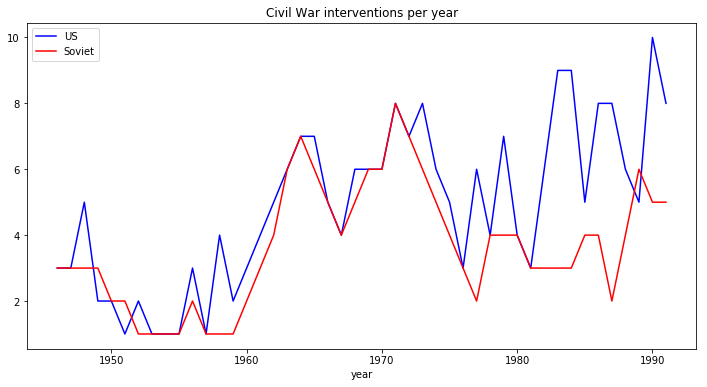

In [9]:
cw_grouped.plot('year', ['US_any', 'SU_any'], color=['blue', 'red'],
               label=['US', 'Soviet'], title='Civil War interventions per year', 
               figsize=(12,6), ls='-')
plt.savefig('./graphs/CW_int_ALL.png')

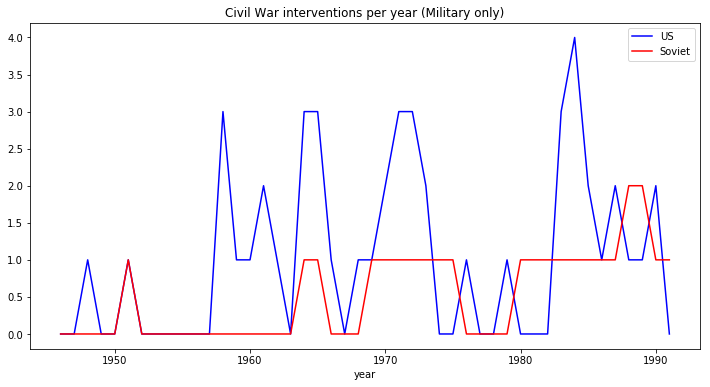

In [10]:
cw_grouped.plot('year', ['United States', 'Soviet Union'], color=['blue', 'red'],
               label=['US', 'Soviet'], title='Civil War interventions per year (Military only)', 
               figsize=(12,6), ls='-')
plt.savefig('./graphs/CW_int_MI.png')

In [11]:
cw_grouped['us_perc'] = cw_grouped['United States'] / cw_grouped['DUMMY_CIVIL']
cw_grouped['su_perc'] = cw_grouped['Soviet Union'] / cw_grouped['DUMMY_CIVIL']
cw_grouped['col_perc'] = cw_grouped['COL_ci'] / cw_grouped['DUMMY_CIVIL']

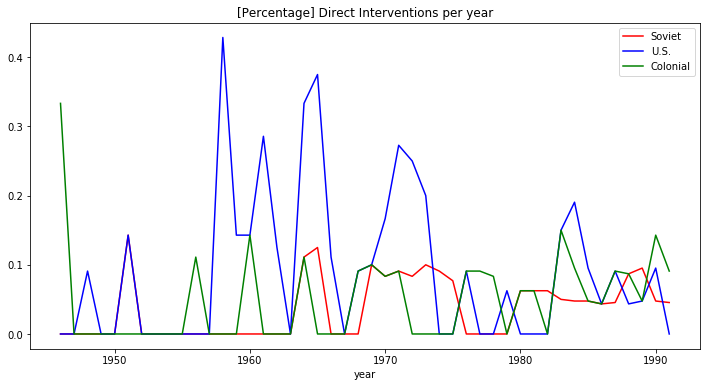

In [12]:
cw_grouped.plot('year',
                ['su_perc', 'us_perc', 'col_perc'],
                color=['r', 'b', 'g'],
                title='[Percentage] Direct Interventions per year',
                figsize=grote,
                label=['Soviet', 'U.S.', 'Colonial']
               )
plt.savefig('./graphs/CW_int_pct.png')

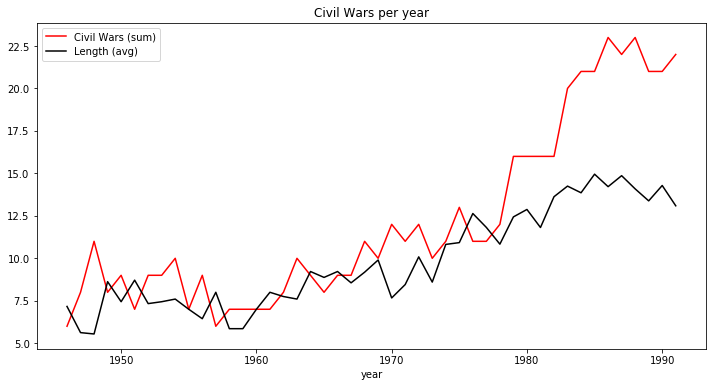

In [13]:
cw_grouped.plot('year', ['DUMMY_CIVIL', 'war_duration'], color=['red', 'black'],
               label=['Civil Wars (sum)', 'Length (avg)'], title='Civil Wars per year', 
               figsize=(12,6), ls='-')
plt.savefig('./graphs/No_CW_ALL.png')

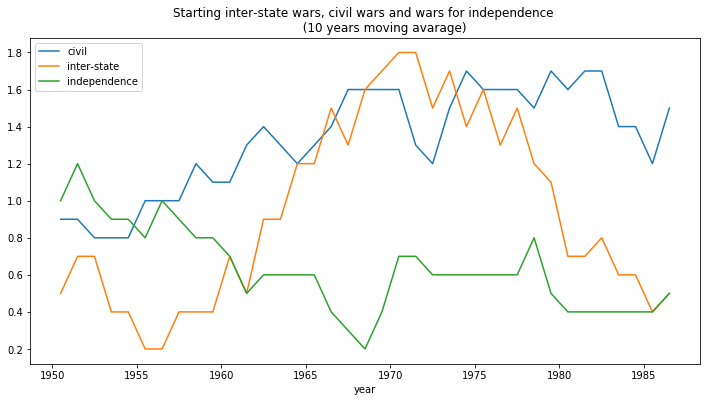

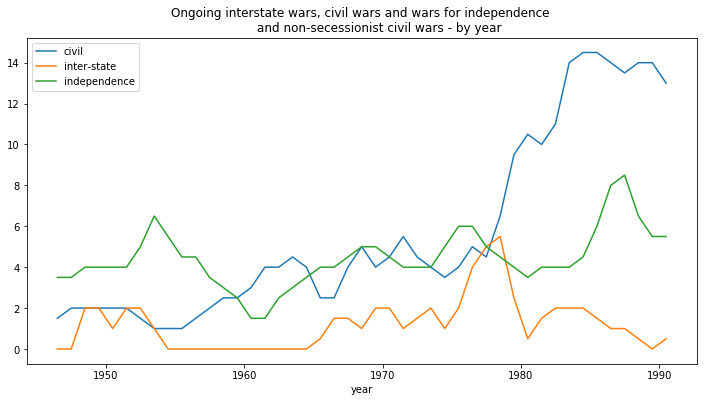

In [14]:
cy_grouped[
    ['year', 'ocivil', 'ointer', 'onatind']
].rolling(10).mean().plot(
    'year', [ 'ocivil', 'ointer',
             'onatind'],
    title='''Starting inter-state wars, civil wars and wars for independence 
          (10 years moving avarage)''',
    figsize=grote,
    label=['civil', 'inter-state', 'independence']
)

plt.savefig('./graphs/wars_starting.png')

cy_grouped[
    ['year', 'pocivil', 'pointer', 'ponatind']
].rolling(2).mean().plot(
    'year', ['pocivil', 'pointer', 'ponatind'],
    title='''Ongoing interstate wars, civil wars and wars for independence 
         and non-secessionist civil wars - by year''',
    figsize=grote,
    label=['civil', 'inter-state', 'independence']
)

plt.savefig('./graphs/wars_ongoing.png')

In [15]:
# Soviet Interventions - US power
print(run_ols(['US_any', 'n_civilwars'], 'SU_any'))

                            OLS Regression Results                            
Dep. Variable:                 SU_any   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     20.69
Date:                Thu, 21 Jun 2018   Prob (F-statistic):           5.07e-07
Time:                        18:00:59   Log-Likelihood:                -77.622
No. Observations:                  46   AIC:                             161.2
Df Residuals:                      43   BIC:                             166.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.8308      0.525      3.486      

In [16]:
print(run([
 'US_any',
 'n_civilwars',
 'US_cinc',
 'SU_cinc',
 'democ',
 'autoc',
#  'was_colony',
#  'non-aligned leaning West',
#  'non-aligned leaning East',
 'non-aligned',
 'West bloc',
 'East bloc',
    
],   
    
 'SU_any'))

Optimization terminated successfully.
         Current function value: 0.445520
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 SU_any   No. Observations:                  562
Model:                          Logit   Df Residuals:                      553
Method:                           MLE   Df Model:                            8
Date:                Thu, 21 Jun 2018   Pseudo R-squ.:                  0.2696
Time:                        18:00:59   Log-Likelihood:                -250.38
converged:                       True   LL-Null:                       -342.80
                                        LLR p-value:                 9.967e-36
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
US_any          2.4247      0.236     10.291      0.000       1.963       2.887
n_civilwars    -0.0422    

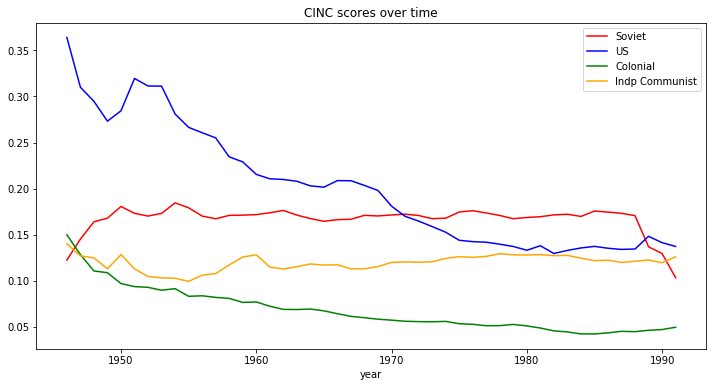

In [17]:
cy_grouped.plot('year', ['SU_cinc', 'US_cinc', 'COL_cinc', 'COM_cinc'],
                color=['r','b', 'g', 'orange'],
                title='CINC scores over time', figsize=grote,
               label=['Soviet', 'US', 'Colonial', 'Indp Communist'])
plt.savefig('./graphs/Cinc_scores.png')

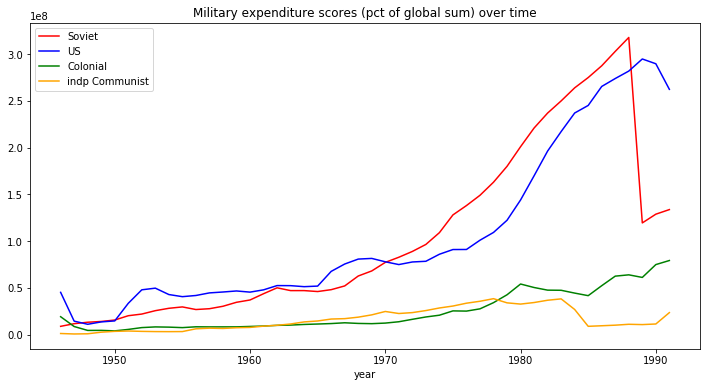

In [18]:
cy_grouped.plot('year', ['SU_milex', 'US_milex', 'COL_milex', 'COM_milex'],
                color=['r','b', 'g', 'orange'],
                title='Military expenditure scores (pct of global sum) over time', figsize=grote,
               label=['Soviet', 'US', 'Colonial', 'indp Communist'])
plt.savefig('./graphs/Milex_scores.png')

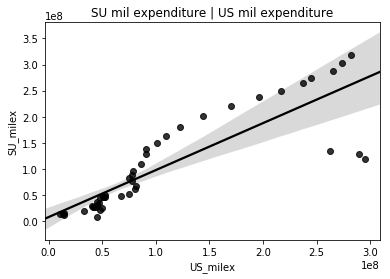

In [19]:
plt.figure(figsize=((6,4)))
sn.regplot('US_milex', 'SU_milex', data=cw_grouped, color='black',
          ).set_title('SU mil expenditure | US mil expenditure')

plt.savefig('./graphs/scatter_coldwar.png')

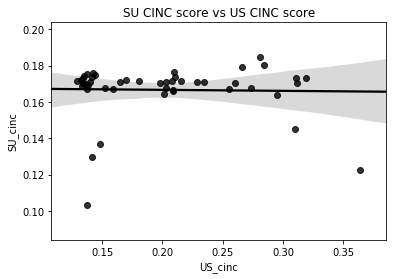

In [20]:
plt.figure(figsize=((6,4)))
sn.regplot('US_cinc', 'SU_cinc', data=cw_grouped, color='black',
          ).set_title('SU CINC score vs US CINC score')

plt.savefig('./graphs/scatter_cinc_lose.png')

# The two graphs above illustrate the Soviet defeat
They matched US milex, but did not have the economic growth to back it up


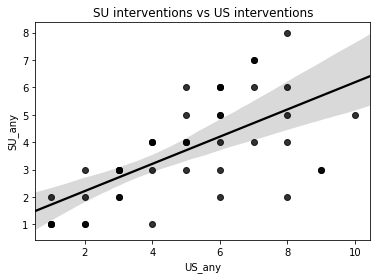

In [21]:
plt.figure(figsize=((6,4)))
sn.regplot('US_any', 'SU_any', data=cw_grouped, color='black',
          ).set_title('SU interventions vs US interventions')

plt.savefig('./graphs/scatter_ANY_ints.png')

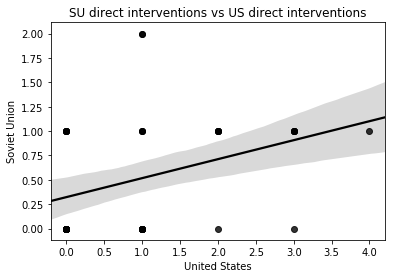

In [22]:
plt.figure(figsize=((6,4)))
sn.regplot('United States', 'Soviet Union', data=cw_grouped, color='black',
          ).set_title('SU direct interventions vs US direct interventions')

plt.savefig('./graphs/scatter_direct_ints.png')

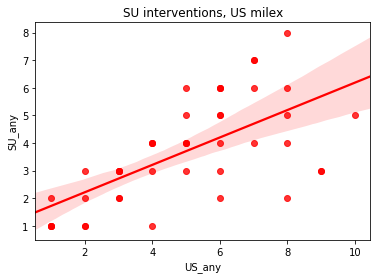

In [23]:
plt.figure(figsize=((6,4)))
sn.regplot('US_any', 'SU_any', data=cw_grouped, color='r',
          ).set_title('SU interventions, US milex')

plt.savefig('./graphs/scatter_ANY_ints.png')

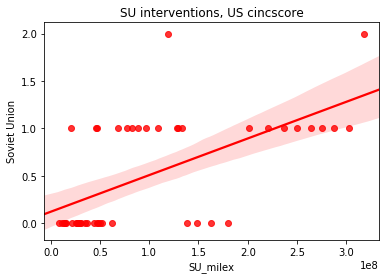

In [24]:
plt.figure(figsize=((6,4)))
sn.regplot('SU_milex', 'Soviet Union', data=cw_grouped, color='r',
          ).set_title('SU interventions, US cincscore')

plt.savefig('./graphs/scatter_SU_USCINC.png')

## POWER REL OLS

In [25]:
print(run_ols(
    [
        'SU_share',
        'SU_non_mil_share',
         'US_cinc',   
    ],
    'US_share'

))

                            OLS Regression Results                            
Dep. Variable:               US_share   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     4.537
Date:                Thu, 21 Jun 2018   Prob (F-statistic):            0.00764
Time:                        18:01:02   Log-Likelihood:                 42.452
No. Observations:                  46   AIC:                            -76.90
Df Residuals:                      42   BIC:                            -69.59
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0002      0.061  

In [26]:
print(run_ols(
    [
        'SU_share',
        'SU_non_mil_share',
         'US_cinc',   
    ],
    'US_non_mil_share'

))

                            OLS Regression Results                            
Dep. Variable:       US_non_mil_share   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     41.20
Date:                Thu, 21 Jun 2018   Prob (F-statistic):           1.41e-12
Time:                        18:01:02   Log-Likelihood:                 43.621
No. Observations:                  46   AIC:                            -79.24
Df Residuals:                      42   BIC:                            -71.93
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2060      0.059  

### SU version

In [27]:
print(run_ols(
    [
        'US_share',
        'US_non_mil_share',
         'SU_cinc',   
    ],
    'SU_non_mil_share'

))

                            OLS Regression Results                            
Dep. Variable:       SU_non_mil_share   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     34.35
Date:                Thu, 21 Jun 2018   Prob (F-statistic):           2.22e-11
Time:                        18:01:02   Log-Likelihood:                 43.342
No. Observations:                  46   AIC:                            -78.68
Df Residuals:                      42   BIC:                            -71.37
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0262      0.177  

In [28]:
print(run_ols(
    [
        'US_share',
        'US_non_mil_share',
         'SU_cinc',   
    ],
    'SU_share'

))

                            OLS Regression Results                            
Dep. Variable:               SU_share   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     2.827
Date:                Thu, 21 Jun 2018   Prob (F-statistic):             0.0500
Time:                        18:01:02   Log-Likelihood:                 83.590
No. Observations:                  46   AIC:                            -159.2
Df Residuals:                      42   BIC:                            -151.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0468      0.074  

In [59]:
print(run_ols(
    [
        'US_share',
        'US_non_mil_share',
#         'SU_none_mil',
#         'n_civilwars',
        'SU_cinc',
#         'US_cinc',
    
    ],
    'SU_share'
    # ALSO US MIL
))

                            OLS Regression Results                            
Dep. Variable:               SU_share   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     2.827
Date:                Thu, 21 Jun 2018   Prob (F-statistic):             0.0500
Time:                        18:05:32   Log-Likelihood:                 83.590
No. Observations:                  46   AIC:                            -159.2
Df Residuals:                      42   BIC:                            -151.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0468      0.074  

## Cold War Dynamics - Logit

In [82]:
print(run([
     'SU_any',
     'SU_share',
     'SU_non_mil_share',
     'US_cinc',
     'SU_cinc',
     
     'cinc',
     'gdppc',
    
     #M2
     'non-aligned leaning West',
     'non-aligned leaning East',
     'non-aligned',
     'NATIND',
  
    
],'United States'))

Optimization terminated successfully.
         Current function value: 0.253834
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          United States   No. Observations:                  279
Model:                          Logit   Df Residuals:                      268
Method:                           MLE   Df Model:                           10
Date:                Thu, 21 Jun 2018   Pseudo R-squ.:                  0.4402
Time:                        18:11:48   Log-Likelihood:                -70.820
converged:                       True   LL-Null:                       -126.51
                                        LLR p-value:                 2.814e-19
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
SU_any                       0.4470      0.505      0.885      0.376      -0.543

## SU version

In [99]:
print(run([
     #m1 & 2
     'US_none_mil', 
     #m3 
#      'United States',
#      'United States',
     'US_share',
     'US_non_mil_share',
     'US_cinc',
     'SU_cinc',
     
     'cinc',
     'gdppc',
    
#      #M2
#      'non-aligned leaning West',
#      'non-aligned leaning East',
#      'non-aligned',
#      'NATIND',
  
    
],'SU_none_mil'))

Optimization terminated successfully.
         Current function value: 0.545559
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            SU_none_mil   No. Observations:                  293
Model:                          Logit   Df Residuals:                      286
Method:                           MLE   Df Model:                            6
Date:                Thu, 21 Jun 2018   Pseudo R-squ.:                  0.1639
Time:                        18:47:24   Log-Likelihood:                -159.85
converged:                       True   LL-Null:                       -191.17
                                        LLR p-value:                 1.301e-11
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
US_none_mil          1.0982      0.297      3.701      0.000       0.517       1.680
US_share   

## Hypo 4(?) Domnestic POlitics

### US Domnestic politics: Mil

In [31]:
# Add normalized datasets, that correct for the number of years in office 
df_presN = cw_df.groupby(['president']).agg({
    'US_any': 'sum',
    'United States': 'sum',
    'US_none_mil': 'sum',
    'Soviet Union': 'sum',
    'COL_ci': 'sum',
    'US_ci': 'mean',
    'year': lambda x: x.nunique()
})
df_presN['US_normalized'] = df_presN['United States'] / df_presN['year']
df_presN['US_none_mil_normalized'] = df_presN['US_none_mil'] / df_presN['year']
# The 'year' variable is no longer required, and this is a cruel world. Deleting it. 
df_presN.drop('year', axis=1, inplace=True)

df_partyN = cw_df.groupby('party').agg({
    'US_any': 'sum',
    'United States': 'sum',
    'US_none_mil': 'sum',
    'Soviet Union': 'sum',
    'COL_ci': 'sum',
    'year': lambda x: x.nunique()
})
df_partyN['US_normalized'] = df_partyN['United States'] / df_partyN['year']
df_partyN['US_none_mil_normalized'] = df_partyN['US_none_mil'] / df_partyN['year']
# #YEAR_VARIABLE2018 #NEVERFORGET
df_partyN.drop('year', axis=1, inplace=True)


,Indirect,Indirect (Normalized),Direct,Direct (Normalized)
president,,,,
Dwight D. Eisenhower,15.0,1.875000,5.0,0.625000
George H. W. Bush,23.0,7.666667,3.0,1.000000
Gerald Ford,13.0,4.333333,1.0,0.333333
Harry S. Truman,17.0,2.428571,2.0,0.285714
Jimmy Carter,20.0,5.000000,1.0,0.250000
John F. Kennedy,7.0,3.500000,3.0,1.500000
Lyndon B. Johnson,35.0,5.833333,8.0,1.333333
Richard Nixon,35.0,7.000000,11.0,2.200000
Ronald Reagan,45.0,5.625000,13.0,1.625000


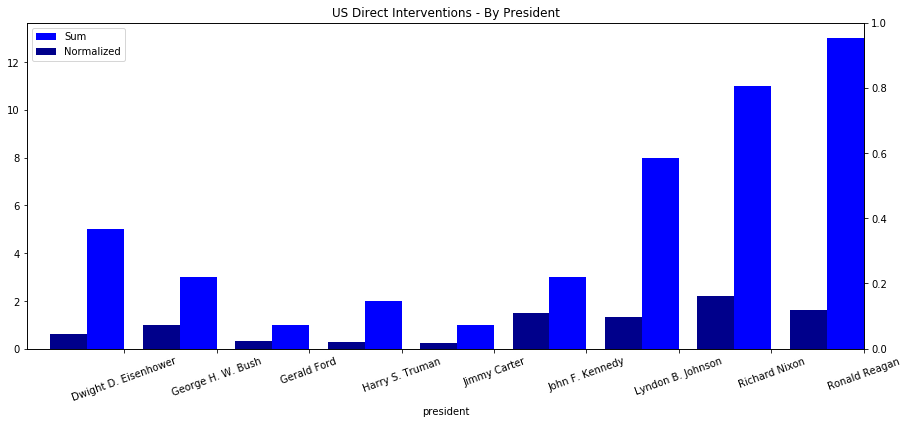

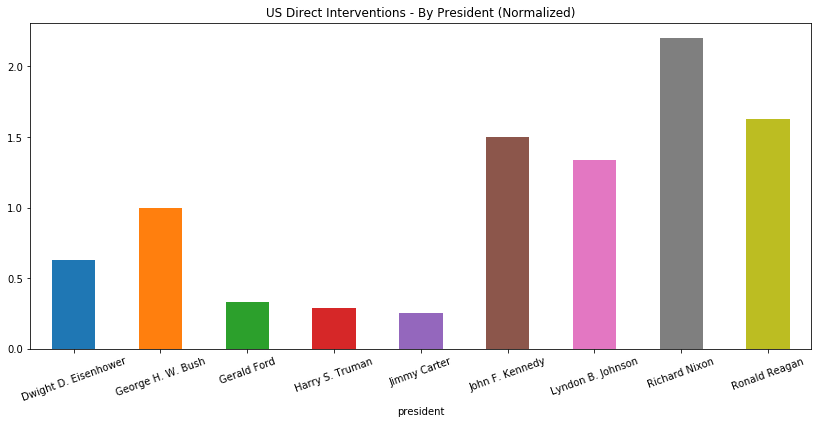

In [32]:
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4

df_presN.reset_index().plot.bar(
    'president', 'United States', rot=20,
    title='US Direct Interventions - By President',
    color='blue', ax=ax, width=width, position=1,
    label='Sum', legend=True, figsize=(14,6))

df_presN.reset_index().plot.bar(
    'president', 'US_normalized', rot=20,
    title='US Direct Interventions - By President',
    color='darkblue', ax=ax, width=width, position=2,
    label='Normalized', legend=True, figsize=(15,6))

plt.savefig('./graphs/President_direct_interventions_both.png')

df_presN.reset_index(
).plot.bar('president', 'US_normalized',
           rot=20, title='US Direct Interventions - By President (Normalized)',
           figsize=(14,6), legend=None)

plt.savefig('./graphs/President_direct_interventions_norm.png')
use = df_presN[['US_none_mil', 'US_none_mil_normalized', 'United States', 'US_normalized']]

use.columns=['Indirect', 'Indirect (Normalized)', 'Direct', 'Direct (Normalized)']
use

,US_any,Soviet Union,US_none_mil,COL_ci,United States,US_normalized,US_none_mil_normalized
party,,,,,,,
Democratic,83,4.0,79.0,7,14.0,0.736842,4.157895
Republican,142,20.0,131.0,24,33.0,1.222222,4.851852


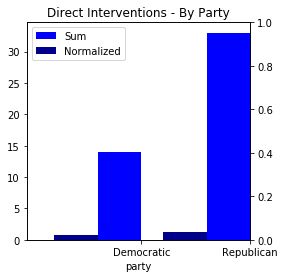

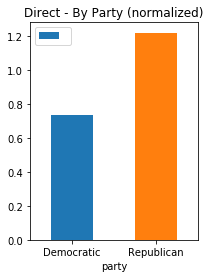

In [33]:
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4

df_partyN.reset_index().plot.bar(
    'party', 'United States', rot=30,
    title='US Direct Interventions - By Party',
    color='blue', ax=ax, width=width, position=1,
    label='Sum', legend=True, figsize=grote)

df_partyN.reset_index().plot.bar(
    'party', 'US_normalized', rot=0,
    title='Direct Interventions - By Party',
    color='darkblue', ax=ax, width=width, position=2,
    label='Normalized', legend=True, figsize=(4,4))

plt.savefig('./graphs/Party_direct_interventions_both.png')

df_partyN[['COL_ci', 'United States', 'Soviet Union']]
df_partyN.reset_index(
).plot.bar('party', 'US_normalized',
           rot=0, title='Direct - By Party (normalized)', 
           figsize=(3,4), label='')

plt.savefig('./graphs/Party_direct_interventions_norm.png')

df_partyN

### US Domnestic Politics, None-Mil

,US_any,Soviet Union,US_none_mil,COL_ci,United States,US_ci,US_normalized,US_none_mil_normalized
president,,,,,,,,
Dwight D. Eisenhower,16,0.0,15.0,2,5.0,0.080645,0.625000,1.875000
George H. W. Bush,23,4.0,23.0,6,3.0,0.046875,1.000000,7.666667
Gerald Ford,14,2.0,13.0,1,1.0,0.028571,0.333333,4.333333
Harry S. Truman,18,1.0,17.0,2,2.0,0.034483,0.285714,2.428571
Jimmy Carter,21,1.0,20.0,3,1.0,0.018182,0.250000,5.000000
John F. Kennedy,9,0.0,7.0,0,3.0,0.200000,1.500000,3.500000
Lyndon B. Johnson,35,2.0,35.0,2,8.0,0.142857,1.333333,5.833333
Richard Nixon,35,5.0,35.0,3,11.0,0.200000,2.200000,7.000000
Ronald Reagan,54,9.0,45.0,12,13.0,0.080247,1.625000,5.625000


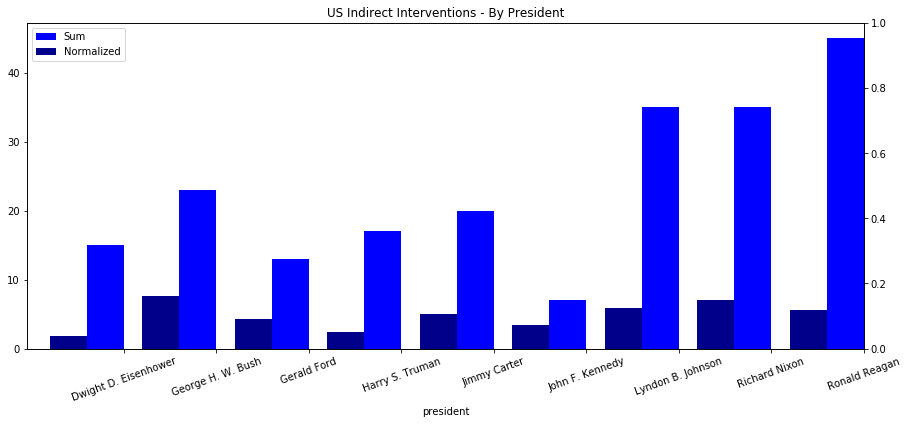

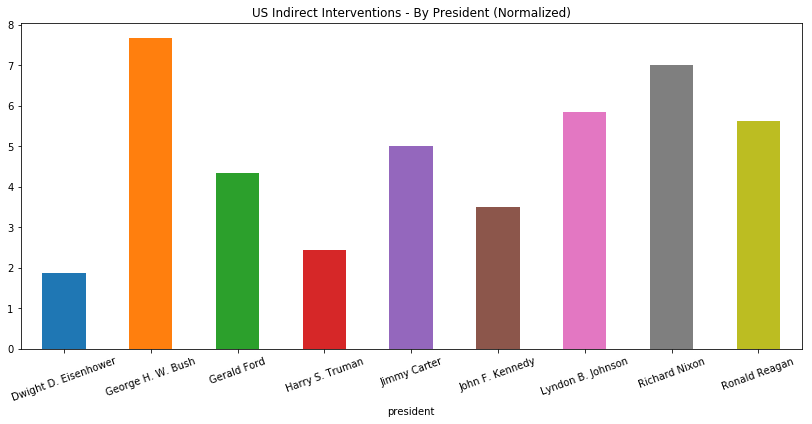

In [34]:
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4

df_presN.reset_index().plot.bar(
    'president', 'US_none_mil', rot=20,
    title='US Indirect Interventions - By President',
    color='blue', ax=ax, width=width, position=1,
    label='Sum', legend=True, figsize=(14,6))

df_presN.reset_index().plot.bar(
    'president', 'US_none_mil_normalized', rot=20,
    title='US Indirect Interventions - By President',
    color='darkblue', ax=ax, width=width, position=2,
    label='Normalized', legend=True, figsize=(15,6))

plt.savefig('./graphs/President_indirect_interventions_both.png')

df_presN.reset_index(
).plot.bar('president', 'US_none_mil_normalized',
           rot=20, title='US Indirect Interventions - By President (Normalized)',
           figsize=(14,6), legend=None)

plt.savefig('./graphs/President_indirect_interventions_norm.png')
df_presN

,US_any,Soviet Union,US_none_mil,COL_ci,United States,US_normalized,US_none_mil_normalized
party,,,,,,,
Democratic,83,4.0,79.0,7,14.0,0.736842,4.157895
Republican,142,20.0,131.0,24,33.0,1.222222,4.851852


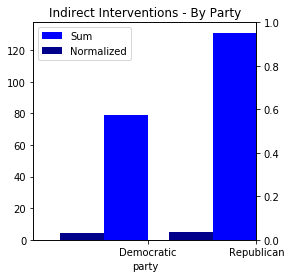

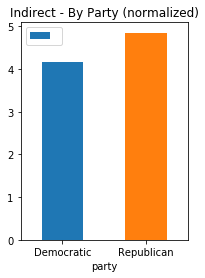

In [35]:
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4

df_partyN.reset_index().plot.bar(
    'party', 'US_none_mil', rot=30,
    title='US Indirect Interventions - By Party',
    color='blue', ax=ax, width=width, position=1,
    label='Sum', legend=True, figsize=grote)

df_partyN.reset_index().plot.bar(
    'party', 'US_none_mil_normalized', rot=0,
    title='Indirect Interventions - By Party',
    color='darkblue', ax=ax, width=width, position=2,
    label='Normalized', legend=True, figsize=(4,4))

plt.savefig('./graphs/Party_indirect_interventions_both.png')

df_partyN[['COL_ci', 'United States', 'Soviet Union']]
df_partyN.reset_index(
).plot.bar('party', 'US_none_mil_normalized',
           rot=0, title='Indirect - By Party (normalized)', 
           figsize=(3,4), label='')

plt.savefig('./graphs/Party_indirect_interventions_norm.png')

df_partyN

In [36]:
# 'Vietnam_dummy': 'first',
#         'Vietnam_years_since': 'first',
#         'pres_election_year': 'first',

#### US - By Party

#### Hypo A: Republicans more likely to intervene

In [37]:
print(run_ols([
    'Democratic',
    'Republican',
    'Soviet Union',
    'n_civilwars',
], 'United States'))

                            OLS Regression Results                            
Dep. Variable:          United States   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     2.467
Date:                Thu, 21 Jun 2018   Prob (F-statistic):             0.0753
Time:                        18:01:06   Log-Likelihood:                -67.255
No. Observations:                  46   AIC:                             142.5
Df Residuals:                      42   BIC:                             149.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5394      0.298      1.807   

In [38]:
print(run_ols([
    'Democratic',
    'Republican',
    'Soviet Union',
    'n_civilwars',

], 'US_none_mil'))

                            OLS Regression Results                            
Dep. Variable:            US_none_mil   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     8.719
Date:                Thu, 21 Jun 2018   Prob (F-statistic):           0.000130
Time:                        18:01:06   Log-Likelihood:                -91.677
No. Observations:                  46   AIC:                             191.4
Df Residuals:                      42   BIC:                             198.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.3218      0.508      2.604   

In [39]:
print(run([
'George H. W. Bush',
'Gerald Ford', 
# 'Harry S. Truman', 
'Jimmy Carter', 
'John F. Kennedy', 
'Lyndon B. Johnson', 
'Richard Nixon', 
'Ronald Reagan',
'Dwight D. Eisenhower',
'Vietnam_dummy',
 'SU_any',
# 'Soviet Union',
# 'SU_none_mil',
'US_gdppc',
'US_cinc',
'pres_election_year',
  'n_civilwars',
#    'DUMMY_CIVIL',
], 'US_any'))

# Alleen mil int tevee

Optimization terminated successfully.
         Current function value: 0.536647
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 US_any   No. Observations:                  562
Model:                          Logit   Df Residuals:                      548
Method:                           MLE   Df Model:                           13
Date:                Thu, 21 Jun 2018   Pseudo R-squ.:                  0.2028
Time:                        18:01:06   Log-Likelihood:                -301.60
converged:                       True   LL-Null:                       -378.31
                                        LLR p-value:                 4.183e-26
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
George H. W. Bush        0.7064      2.265      0.312      0.755      -3.733       5.146

In [40]:
print(run([
 'Andropov',
'Brezhnev',
'Chernenko',
'Gorbachev',
'Khrushchev',
# 'Stalin',
# # 'Vietnam_dummy',
  'US_any',
'SU_gdppc',
# 'Soviet Union',
# 'SU_none_mil',
# 'pres_election_year',
  'n_civilwars',
#    'DUMMY_CIVIL',
], 'SU_any'))

# Alleen mil int tevee

Optimization terminated successfully.
         Current function value: 0.456578
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 SU_any   No. Observations:                  562
Model:                          Logit   Df Residuals:                      554
Method:                           MLE   Df Model:                            7
Date:                Thu, 21 Jun 2018   Pseudo R-squ.:                  0.2515
Time:                        18:01:06   Log-Likelihood:                -256.60
converged:                       True   LL-Null:                       -342.80
                                        LLR p-value:                 7.837e-34
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Andropov        1.3036      0.964      1.353      0.176      -0.585       3.193
Brezhnev        1.7998    

In [ ]:
print(run([
     'Soviet Union',
# #     'SU_none_mil',
#      'SU_any',
     'COM_IMI',
    
     'pres_election_year',
#     'Vietnam_dummy',
#     'George H. W. Bush',
#     'Gerald Ford', 
#     'Harry S. Truman', 
#     'Jimmy Carter', 
#     'John F. Kennedy', 
#     'Lyndon B. Johnson', 
#     'Richard Nixon',
    Dwight D. Eisenhower
    'Ronald Reagan',
#     'Republican', 
    'Vietnam_dummy',
#     'Democratic',
     'cinc',
    
    
#     'n_civilwars',
    
     'democl',
     'autocl',
     
# MONROE MOLT DEMO / JUST WAR
#     'lamerica',
    
    'non-aligned leaning West',
    'non-aligned leaning East',
    'non-aligned',
    'NATIND',
    
    'war_duration',
    
    
],'United States'))

### SU

In [ ]:
print(run([
     'US_any',
# #     'SU_none_mil',
#      'SU_any',
#      'COM_IMI',
    
#      'pres_election_year',
#     'Vietnam_dummy',
#     'George H. W. Bush',
#     'Gerald Ford', 
#     'Harry S. Truman', 
#     'Jimmy Carter', 
#     'John F. Kennedy', 
#     'Lyndon B. Johnson', 
#     'Richard Nixon', 
#     'Ronald Reagan',
#     'Republican', 
#     'Vietnam_dummy',
#     'Democratic',
     'cinc',
    
    
#     'n_civilwars',
    
     'democl',
     'autocl',
     
# MONROE MOLT DEMO / JUST WAR
#     'lamerica',
    
    'non-aligned leaning West',
    'non-aligned leaning East',
    'non-aligned',
    'NATIND',
    
    'war_duration',
    
    
],'SU_any'))

In [ ]:
# Create SU leader dataframe
df_sul = cw_df.groupby(
    ['Andropov', 'Brezhnev', 'Chernenko',
       'Gorbachev', 'Khrushchev', 'Stalin']
).sum()[['United States', 'Soviet Union', 'COL_ci']].reset_index()

# Add normalized datasets, that correct for the number of years in office 
df_sulN = cw_df.groupby('SU_leader').agg({
    'United States': 'sum',
    'Soviet Union': 'sum',
    'SU_none_mil': 'sum',
    'COL_ci': 'sum',
    'war': 'sum',
    'year': lambda x: x.nunique()
})
df_sulN['SU_normalized'] = df_sulN['Soviet Union'] / df_sulN['year']
df_sulN['SU_none_mil_normalized'] = df_sulN['SU_none_mil'] / df_sulN['year']

df_sulN['war_N'] = df_sulN['war'] / df_sulN['year']

fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4

df_sulN.reset_index().plot.bar(
    'SU_leader', 'Soviet Union', rot=0,
    title='Soviet Direct Interventions - by leader',
    color='red', ax=ax, width=width, position=1,
    label='Sum', legend=True)

df_sulN.reset_index().plot.bar(
    'SU_leader', 'SU_normalized', rot=0,
    title='Soviet Direct Interventions - by leader',
    color='darkred', ax=ax, width=width, position=2,
    label='Normalized', legend=True, figsize=grote)

plt.savefig('./graphs/SU_leaders_direct_interventions_both.png')
    
df_sulN.reset_index().plot.bar(
    'SU_leader', 'SU_normalized', rot=0,
    title='Soviet Direct Interventions - by leader (Normalized)',
    color='darkred', figsize=grote)

plt.savefig('./graphs/SU_leaders_direct_interventions.png')

df_sulN

### #NoneMils

In [ ]:
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
width = 0.4

df_sulN.reset_index().plot.bar(
    'SU_leader', 'SU_none_mil', rot=0,
    title='Soviet Indirect Interventions - by leader',
    color='red', ax=ax, width=width, position=1,
    label='Sum', legend=True)

df_sulN.reset_index().plot.bar(
    'SU_leader', 'SU_none_mil_normalized', rot=0,
    title='Soviet Indirect Interventions - by leader',
    color='darkred', ax=ax, width=width, position=2,
    label='Normalized', legend=True, figsize=grote)

plt.savefig('./graphs/SU_leaders_indirect_interventions_both.png')
    
df_sulN.reset_index().plot.bar(
    'SU_leader', 'SU_none_mil_normalized', rot=0,
    title='Soviet Indirect Interventions - by leader (Normalized)',
    color='darkred', figsize=grote)

plt.savefig('./graphs/SU_leaders_indirect_interventions.png')

df_sulN

# Hypothesis 2: The U.S. and S.U. interventions are driven by political / ideological reasons.


#### 2a: United States interventions are influenced by the political system of the target country.

In [163]:
mask = cw_df['US_any'] == 1
US_ethic_df = cw_df[mask]

# Oppose rebels or opposition groups
#base_df['COL_IMI'] = (base_df[col_list].sum(axis=1) > 0) * 1 

In [235]:
print(run([

    #m1
#     """
#     Toont duidelijk aan, nare regimes niet snel geholpen
#     """
  'democ',
  'autoc',
  'anoc',
    
#    #m2
#     """
#     Verschil tussen Demo en autoc snel weg
#     """
#   'democ',
#   'autoc',
#   'anoc',
#   'SU_any',
    
#    #m3
    
#     """
#     Verschil bijna helemaal weg, Reagan steunt ten alles
    
#     """
    
    
#   'democ',
#   'autoc',
#   'anoc',
#   'SU_any',  
#   'instabl',
#   'Ronald Reagan',
  
    
],   
    
 'Support government', df=US_ethic_df))

# US more likely to support DEMOC!

Optimization terminated successfully.
         Current function value: 0.389300
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:     Support government   No. Observations:                  225
Model:                          Logit   Df Residuals:                      222
Method:                           MLE   Df Model:                            2
Date:                Thu, 21 Jun 2018   Pseudo R-squ.:                -0.01309
Time:                        20:11:22   Log-Likelihood:                -87.592
converged:                       True   LL-Null:                       -86.461
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
democ         -1.2238      0.509     -2.405      0.016      -2.221      -0.227
autoc         -2.0455      0.

In [247]:
print(run([

#     #m1
#     """
#     Toont duidelijk aan, nare regimes niet snel geholpen
#     """
#   'democ',
#   'autoc',
#   'anoc',
    
   #m2
#     """
#     Verschil tussen Demo en autoc snel weg
#     """
  'democ',
  'autoc',
  'anoc',
  'SU_any',
    
   #m3
    
#     """
#     Verschil bijna helemaal weg, Reagan steunt ten alles
    
#     """
    
    
#   'democ',
#   'autoc',
#   'anoc',
#   'SU_any',  
#   'instabl',
#   'Ronald Reagan',
    
    #m4
    #YO, alleen dus als SU er is
#   'democ',
#   'autoc',
#   'anoc',
#   'instabl',
#   'Ronald Reagan',

 
    
],   
    
 'Support government', df=US_ethic_df))

# US more likely to support DEMOC!

Optimization terminated successfully.
         Current function value: 0.365971
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     Support government   No. Observations:                  225
Model:                          Logit   Df Residuals:                      221
Method:                           MLE   Df Model:                            3
Date:                Thu, 21 Jun 2018   Pseudo R-squ.:                 0.04762
Time:                        20:17:40   Log-Likelihood:                -82.344
converged:                       True   LL-Null:                       -86.461
                                        LLR p-value:                   0.04142
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
democ         -0.9764      0.520     -1.876      0.061      -1.996       0.044
autoc         -1.3866      0.

In [249]:
print(run([

#     #m1
#     """
#     Toont duidelijk aan, nare regimes niet snel geholpen
#     """
#   'democ',
#   'autoc',
#   'anoc',
    
   #m2
#     """
#     Verschil tussen Demo en autoc snel weg
#     """
#   'democ',
#   'autoc',
#   'anoc',
#   'SU_any',
    
   #m3
    
#     """
#     Verschil bijna helemaal weg, Reagan steunt ten alles
    
#     """
    
    
  'democ',
  'autoc',
  'anoc',
  'SU_any',  
  'instabl',
  'Ronald Reagan',
    
    #m4
    #YO, alleen dus als SU er is
#   'democ',
#   'autoc',
#   'anoc',
#   'instabl',
#   'Ronald Reagan',

 
    
],   
    
 'Support government', df=US_ethic_df))

# US more likely to support DEMOC!

Optimization terminated successfully.
         Current function value: 0.356281
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     Support government   No. Observations:                  225
Model:                          Logit   Df Residuals:                      219
Method:                           MLE   Df Model:                            5
Date:                Thu, 21 Jun 2018   Pseudo R-squ.:                 0.07283
Time:                        20:20:27   Log-Likelihood:                -80.163
converged:                       True   LL-Null:                       -86.461
                                        LLR p-value:                   0.02749
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
democ            -1.6504      0.636     -2.595      0.009      -2.897      -0.404
autoc            -1.

In [248]:
print(run([

#     #m1
#     """
#     Toont duidelijk aan, nare regimes niet snel geholpen
#     """
#   'democ',
#   'autoc',
#   'anoc',
    
   #m2
#     """
#     Verschil tussen Demo en autoc snel weg
#     """
#   'democ',
#   'autoc',
#   'anoc',
#   'SU_any',
    
   #m3
    
#     """
#     Verschil bijna helemaal weg, Reagan steunt ten alles
    
#     """
    
    
#   'democ',
#   'autoc',
#   'anoc',
#   'SU_any',  
#   'instabl',
#   'Ronald Reagan',
    
    #m4
    #YO, alleen dus als SU er is
  'democ',
  'autoc',
  'anoc',
  'instabl',
  'Ronald Reagan',

 
    
],   
    
 'Support government', df=US_ethic_df))

# US more likely to support DEMOC!

Optimization terminated successfully.
         Current function value: 0.374454
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:     Support government   No. Observations:                  225
Model:                          Logit   Df Residuals:                      220
Method:                           MLE   Df Model:                            4
Date:                Thu, 21 Jun 2018   Pseudo R-squ.:                 0.02554
Time:                        20:20:20   Log-Likelihood:                -84.252
converged:                       True   LL-Null:                       -86.461
                                        LLR p-value:                    0.3525
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
democ            -1.9463      0.619     -3.143      0.002      -3.160      -0.732
autoc            -2.

## Generate intervention-type graphs

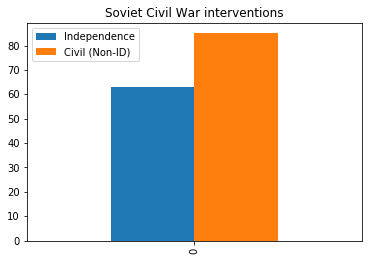

In [335]:
# I haven't slept for a long time and this is what I came up with

temp = cw_df[cw_df['SU_any'] == 1]
temp = temp[['ponatind', 'pocivil', 'SU_any']]
temp.columns=['Independence', 'Civil (Non-ID)', 'Soviet Interventions']
use = temp.groupby('Soviet Interventions').sum().reset_index()
use = use[['Independence', 'Civil (Non-ID)']]

use.plot(kind='bar', title='Soviet Civil War interventions')
plt.savefig('./graphs/Soviet_intervention_types.png')

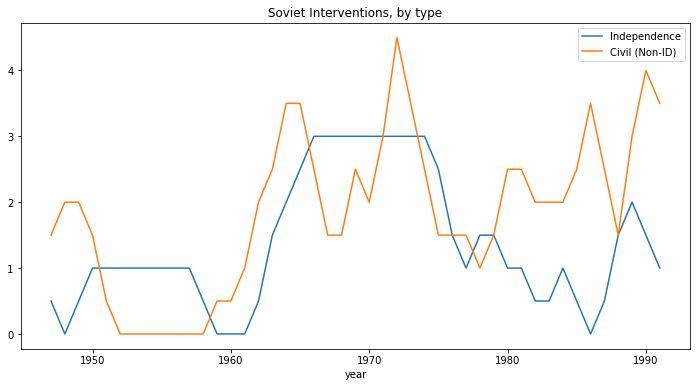

In [336]:
use = cw_df[cw_df['SU_any'] == 1].groupby('year').sum()
use = use[['ponatind', 'pocivil']]
use.columns=['Independence', 'Civil (Non-ID)']
use.rolling(2).mean().plot(
    figsize=grote, title='Soviet Interventions, by type',
)
plt.savefig('./graphs/Soviet_intervention_types_line.png')


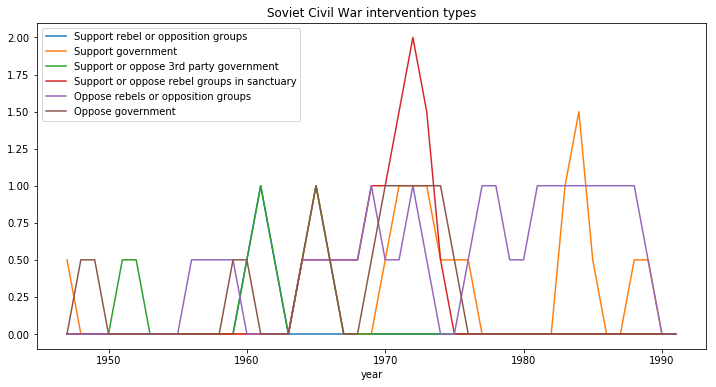

In [352]:
temp = cw_df[cw_df['SU_any'] == 1]
temp = temp[[
    'year',
    'Support rebel or opposition groups',
    'Support government',
    'Support or oppose 3rd party government',
    'Support or oppose rebel groups in sanctuary',
    'Oppose rebels or opposition groups',
    'Oppose government',
    'SU_any']]


temp = temp[
    ['year',
     'Support rebel or opposition groups',
     'Support government',
     'Support or oppose 3rd party government',
    'Support or oppose rebel groups in sanctuary',
     'Oppose rebels or opposition groups',
    'Oppose government',
    ]
]
temp = temp.groupby('year').sum().rolling(2).mean().plot(
    figsize=grote, title='Soviet Civil War intervention types'
)

plt.savefig('./graphs/SU_intervention_by_kind_line.png')

### US Versions

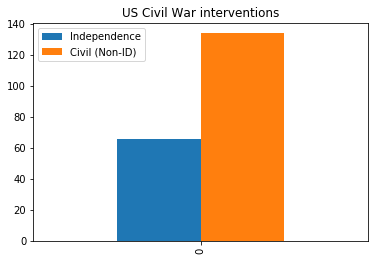

In [338]:
# I haven't slept for a long time and this is what I came up with

temp = cw_df[cw_df['US_any'] == 1]
temp = temp[['ponatind', 'pocivil', 'US_any']]
temp.columns=['Independence', 'Civil (Non-ID)', 'US Interventions']
use = temp.groupby('US Interventions').sum().reset_index()
use = use[['Independence', 'Civil (Non-ID)']]

use.plot(kind='bar', title='US Civil War interventions')
plt.savefig('./graphs/US_intervention_types.png')

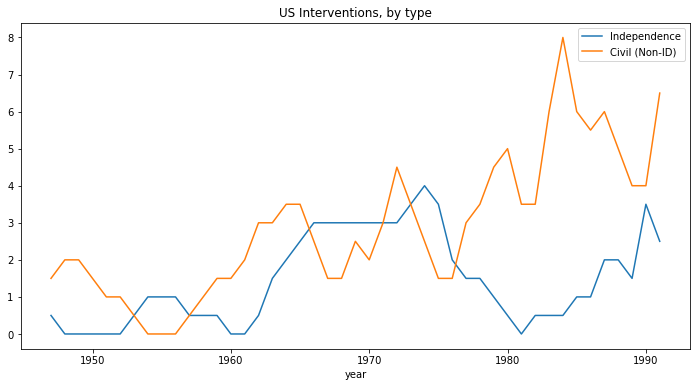

In [339]:
use = cw_df[cw_df['US_any'] == 1].groupby('year').sum()
use = use[['ponatind', 'pocivil']]
use.columns=['Independence', 'Civil (Non-ID)']
use.rolling(2).mean().plot(
    figsize=grote, title='US Interventions, by type',
)
plt.savefig('./graphs/US_intervention_types_line.png')


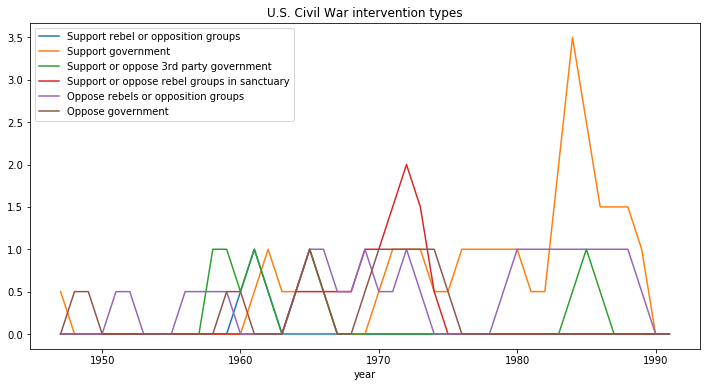

In [362]:
temp = cw_df[cw_df['US_any'] == 1]
temp = temp[[
    'year',
    'Support rebel or opposition groups',
    'Support government',
    'Support or oppose 3rd party government',
    'Support or oppose rebel groups in sanctuary',
    'Oppose rebels or opposition groups',
    'Oppose government',
    'US_any']]


temp = temp[
    ['year',
     'Support rebel or opposition groups',
     'Support government',
     'Support or oppose 3rd party government',
    'Support or oppose rebel groups in sanctuary',
    'Oppose rebels or opposition groups',
    'Oppose government',
    ]
]
temp.groupby('year').sum().rolling(2).mean().plot(
    figsize=grote, title='U.S. Civil War intervention types'
)

plt.savefig('./graphs/US_intervention_by_kind_line.png')


In [343]:
##############################
mask = cw_df['SU_any'] == 1
SU_ethic_df = cw_df[mask]

# Oppose rebels or opposition groups
#base_df['COL_IMI'] = (base_df[col_list].sum(axis=1) > 0) * 1 

In [461]:
print(run([

#     'democ',
#     'US_any',
#     'ponatind',
#      'pocivil',
#     'non-aligned leaning West',
#     'non-aligned leaning East',
#     'non-aligned',
#     'colonial_dummy',
#     'COL_IMI',
#     'autoc',
#     'anoc',
#     'democ', 
    'instabl',
    'East bloc',
#     'cinc',
#    'ponatind',
#    'instabl',
#   'Ronald Reagan',
  
    
], 'SU_any'))  
    
# 'Oppose government', df=SU_ethic_df))

# US more likely to support DEMOC!



Optimization terminated successfully.
         Current function value: 0.678057
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 SU_any   No. Observations:                  562
Model:                          Logit   Df Residuals:                      560
Method:                           MLE   Df Model:                            1
Date:                Thu, 21 Jun 2018   Pseudo R-squ.:                 -0.1116
Time:                        22:24:29   Log-Likelihood:                -381.07
converged:                       True   LL-Null:                       -342.80
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
instabl       -0.9243      0.236     -3.910      0.000      -1.388      -0.461
East bloc           0      1.

# MEGA LOGIT MODEL

In [781]:
print(run(
    [
        
        #Cold War consideration
        'US_any', 
#         'SU_eco',
#         'SU_training', 
#         'SU_weapons',
        
         'US_share', 
         'US_non_mil_share',
        'SU_cinc',
        'US_cinc',
         'non-aligned leaning West',
         'non-aligned leaning East',
        
#         # Colonial war
#          'COL_IMI',
         'NATIND',
         'colonial_dummy',
        
# #         # Third Party Com
#          'COM_IMI',
        
        
        #Nation factors
         'cinc', 
#          'gdppc',       
         'democ',
         'autoc', 
        'instabl',
        
        #domnestic factors
#         'Democratic',
#          'Republican',
#         'Ronald Reagan',
         'SU_gdppc',
#         'Vietnam_dummy',
#          'pres_election_year',
        

    ],
    'SU_any'
))

Optimization terminated successfully.
         Current function value: 0.473968
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 SU_any   No. Observations:                  426
Model:                          Logit   Df Residuals:                      412
Method:                           MLE   Df Model:                           13
Date:                Fri, 22 Jun 2018   Pseudo R-squ.:                  0.1807
Time:                        00:13:01   Log-Likelihood:                -201.91
converged:                       True   LL-Null:                       -246.43
                                        LLR p-value:                 2.124e-13
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
US_any                       1.8928      0.266      7.107      0.000       1.371

In [782]:
vars = [     
        #Cold War consideration
        'US_any', 
#         'SU_eco',
#         'SU_training', 
#         'SU_weapons',
        
         'US_share', 
         'US_non_mil_share',
        'SU_cinc',
        'US_cinc',
         'non-aligned leaning West',
         'non-aligned leaning East',
        
#         # Colonial war
#          'COL_IMI',
         'NATIND',
         'colonial_dummy',
        
# #         # Third Party Com
#          'COM_IMI',
        
        
        #Nation factors
         'cinc', 
#          'gdppc',       
         'democ',
         'autoc', 
        'instabl',
        
        #domnestic factors
#         'Democratic',
#          'Republican',
#         'Ronald Reagan',
         'SU_gdppc',
#         'Vietnam_dummy',
#          'pres_election_year',
        


        
]

In [710]:
vars2 = [     

        
        #Cold War consideration
        'SU_any',
        'SU_share', 
        'SU_non_mil_share',
#         'SU_cinc',
#         'US_cinc',
        'non-aligned leaning West',
        'non-aligned leaning East',
        
#         # Colonial war
#         'COL_IMI',
#         'ponatind',
        
#         # Third Party Com
#         'COM_IMI',
        
        
        #Nation factors
        'cinc', 
        'gdppc',       
        'democ',
        'autoc', 
        'instabl',
        
        #domnestic factors
#         'Democratic',
         'Republican',
#         'Ronald Reagan',
        'US_gdppc',
#         'Vietnam_dummy',
        'pres_election_year',
        

        
]

# ML MODELS

In [661]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import statistics as st

### Prepare Data

In [783]:
y = cw_df['SU_any']
X = cw_df[vars].fillna(0)

### Logistic Model

In [784]:
score_list = []
for x in range(500):
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    lr = LogisticRegression().fit(X_train, y_train)
    score = lr.score(X_test, y_test)
    score_list.append(score)
print(st.mean(score_list))

0.7959574468085107


### Decision Tree

In [785]:
score_list = []
for x in range(500):
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    score = dtc.score(X_test, y_test)
    score_list.append(score)
print(st.mean(score_list))

0.7995035460992908


### Random Forest

In [786]:
score_list = []
for x in range(500):
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    fr = RandomForestClassifier(n_estimators=600)
    fr.fit(X_train, y_train)
    score = fr.score(X_test, y_test)
    score_list.append(score)
print(st.mean(score_list))

0.8092198581560284


### SVM

In [787]:
score_list = []
for x in range(500):
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    clf = SVC()
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    score_list.append(score)
print(st.mean(score_list))

0.7060283687943263


### Neural Network

In [788]:
score_list = []
for x in range(500):
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    clf = MLPClassifier(solver='lbfgs')
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    score_list.append(score)
print(st.mean(score_list))

0.7127659574468085


In [566]:
fr = RandomForestClassifier(n_estimators=500)
fr.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [567]:
fr.score(X_test, y_test)

0.7911111111111111

In [501]:
X.shape

(562, 18)

In [434]:
print(run([

#     'democ',
      'US_any',
#     'NATIND',
    'colonial_dummy',
#      'COL_IMI',
#    'autoc',
#    'anoc',
#      'ponatind',
#    'instabl',

    
],   
    
 'Oppose government', df=SU_ethic_df))


Optimization terminated successfully.
         Current function value: 0.361595
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:      Oppose government   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Thu, 21 Jun 2018   Pseudo R-squ.:                 -0.6024
Time:                        21:57:08   Log-Likelihood:                -60.748
converged:                       True   LL-Null:                       -37.910
                                        LLR p-value:                     1.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
US_any            -2.6057      0.352     -7.392      0.000      -3.297      -1.915
colonial_dummy   

In [341]:
print(run([
    'Soviet Union',
    'SU_none_mil',
    
    'pres_election_year',
#     'Vietnam_dummy',
#     'George H. W. Bush',
#     'Gerald Ford', 
#     'Harry S. Truman', 
#     'Jimmy Carter', 
#     'John F. Kennedy', 
#     'Lyndon B. Johnson', 
#     'Richard Nixon', 
#     'Ronald Reagan',
    'Republican', 
    'Democratic',
#     'US_cinc',
    
     'democl',
     'autocl',
    
#     'non-aligned leaning West',
#     'non-aligned leaning East',
#     'non-aligned',
#     'NATIND',
    
    
],'United States'))

Optimization terminated successfully.
         Current function value: 0.251714
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          United States   No. Observations:                  252
Model:                          Logit   Df Residuals:                      245
Method:                           MLE   Df Model:                            6
Date:                Thu, 21 Jun 2018   Pseudo R-squ.:                 0.09199
Time:                        21:24:21   Log-Likelihood:                -63.432
converged:                       True   LL-Null:                       -69.858
                                        LLR p-value:                   0.04543
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Soviet Union           1.3565      1.043      1.300      0.193      -0.688       3.401
SU_no

In [342]:
print(run([
    'United States',
    'US_none_mil',
    
#     'pres_election_year',
#     'Vietnam_dummy',
#     'George H. W. Bush',
#     'Gerald Ford', 
#     'Harry S. Truman', 
#     'Jimmy Carter', 
#     'John F. Kennedy', 
#     'Lyndon B. Johnson', 
#     'Richard Nixon', 
#     'Ronald Reagan',
#     'Republican', 
#     'Democratic',
#     'US_cinc',
    
     'democl',
     'autocl',
    
#     'non-aligned leaning West',
#     'non-aligned leaning East',
    'non-aligned',
    'NATIND',
    
    
],'SU_none_mil'))

Optimization terminated successfully.
         Current function value: 0.574878
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            SU_none_mil   No. Observations:                  272
Model:                          Logit   Df Residuals:                      266
Method:                           MLE   Df Model:                            5
Date:                Thu, 21 Jun 2018   Pseudo R-squ.:                 0.07001
Time:                        21:24:21   Log-Likelihood:                -156.37
converged:                       True   LL-Null:                       -168.14
                                        LLR p-value:                 0.0002657
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
United States     0.4992      0.435      1.148      0.251      -0.353       1.352
US_none_mil       0.

In [ ]:
mask = cw_df['US_imi'] == 1
df2 = cw_df[mask]
df2 = df2[['Support government', 'Oppose rebels or opposition groups']]

In [ ]:
df2.head()

In [ ]:
for col in cw_df.columns:
    print(col)